In [1]:
import folium
import pandas as pd
import numpy as np
from folium.features import CustomIcon

In [2]:
f = folium.Figure()

center_lat, center_lon = 36.63145, 138.1881
# center_lat, center_lon = 80.0, -30.0

# 緯度1°あたりの距離(m)
dist_per_lat = 1852 * 60
dist_per_lon = dist_per_lat * np.cos(np.deg2rad(center_lat))
# print(dist_per_lat, dist_per_lon)

m = folium.Map([center_lat, center_lon], zoom_start=5).add_to(f)
folium.Marker(location=[center_lat, center_lon]).add_to(m)
m

In [3]:
N = 19
arr = np.arange(N)

radius = 50

circle_lat = radius / dist_per_lat * np.sin(arr / N * np.pi * 2) + center_lat
circle_lon = radius / dist_per_lon * np.cos(arr / N * np.pi * 2) + center_lon

circle_lat_lon = np.stack([circle_lat, circle_lon], axis=1)

pd.options.display.precision = 6

df = pd.DataFrame(circle_lat_lon, columns=["lat", "lon"])
df

,lat,lon
0,36.631450,138.188661
1,36.631596,138.188630
2,36.631726,138.188542
3,36.631827,138.188407
4,36.631886,138.188238
5,36.631898,138.188054
6,36.631862,138.187875
7,36.631781,138.187720
8,36.631664,138.187607
9,36.631524,138.187547


In [4]:
f = folium.Figure()

m = folium.Map([center_lat, center_lon], zoom_start=20).add_to(f)
for i in arr:
    folium.Marker(location=[df["lat"][i], df["lon"][i]]).add_to(m)
m

In [5]:
df.to_csv("csv/circle_sampe_n%d_lat%.4f.csv" % (N, center_lat), index=False)

In [6]:
df_vector = df[1:].copy()
df_vector["lat_prev"] = df[:-1]["lat"].tolist()
df_vector["lon_prev"] = df[:-1]["lon"].tolist()
df_vector["delta_lat"] = df_vector["lat"] - df_vector["lat_prev"]
df_vector["delta_lon"] = df_vector["lon"] - df_vector["lon_prev"]
df_vector["theta"] = np.arctan2(df_vector["delta_lat"], df_vector["delta_lon"])
df_vector

,lat,lon,lat_prev,lon_prev,delta_lat,delta_lon,theta
1,36.631596,138.188630,36.631450,138.188661,0.000146,-0.000030,1.775816
2,36.631726,138.188542,36.631596,138.188630,0.000130,-0.000088,2.164111
3,36.631827,138.188407,36.631726,138.188542,0.000100,-0.000136,2.505334
4,36.631886,138.188238,36.631827,138.188407,0.000060,-0.000169,2.803133
5,36.631898,138.188054,36.631886,138.188238,0.000012,-0.000184,3.075194
6,36.631862,138.187875,36.631898,138.188054,-0.000036,-0.000179,-2.941105
7,36.631781,138.187720,36.631862,138.187875,-0.000081,-0.000155,-2.658700
8,36.631664,138.187607,36.631781,138.187720,-0.000117,-0.000113,-2.340913
9,36.631524,138.187547,36.631664,138.187607,-0.000140,-0.000060,-1.975031
10,36.631376,138.187547,36.631524,138.187547,-0.000148,0.000000,-1.570796


In [7]:
def compute_theta_delta(x):
    x = abs(x)
    if (x > 180):
        x = 360 - x
    return x

In [8]:
df_direction = df_vector[1:][["theta"]].copy()
df_direction["theta_prev"] = df_vector["theta"][:-1].tolist()
df_direction["delta_theta"] = np.rad2deg(df_direction["theta"] - df_direction["theta_prev"]).apply(compute_theta_delta)
df_direction

,theta,theta_prev,delta_theta
2,2.164111,1.775816,22.247696
3,2.505334,2.164111,19.550649
4,2.803133,2.505334,17.062607
5,3.075194,2.803133,15.587960
6,-2.941105,3.075194,15.291466
7,-2.658700,-2.941105,16.180592
8,-2.340913,-2.658700,18.207847
9,-1.975031,-2.340913,20.963500
10,-1.570796,-1.975031,23.160948
11,-1.166562,-1.570796,23.160948


In [9]:
df_direction["delta_theta"].sum()

314.2588318173549

In [10]:
def compute_arc_length(lat1, lat2, lon1, lon2):
    """
    緯度経度から距離を計算 (単位球)
    """
    return np.arccos(np.sin(lat1) * np.sin(lat2) + np.cos(lat1) * np.cos(lat2) * np.cos(lon2 - lon1))

In [11]:
df_3points = df[:-2].copy().rename(columns={"lat": "lat1", "lon": "lon1"})
df_3points["lat2"] = df[1:-1]["lat"].tolist()
df_3points["lon2"] = df[1:-1]["lon"].tolist()
df_3points["lat3"] = df[2:]["lat"].tolist()
df_3points["lon3"] = df[2:]["lon"].tolist()
df_3points = np.deg2rad(df_3points)
c = compute_arc_length(df_3points["lat1"], df_3points["lat2"], df_3points["lon1"], df_3points["lon2"])
b = compute_arc_length(df_3points["lat2"], df_3points["lat3"], df_3points["lon2"], df_3points["lon3"])
a = compute_arc_length(df_3points["lat3"], df_3points["lat1"], df_3points["lon3"], df_3points["lon1"])

df_3points["a"] = a
df_3points["b"] = b
df_3points["c"] = c

df_3points["alpha"] = np.arccos((np.cos(a) - np.cos(b) * np.cos(c)) / (np.sin(b) * np.sin(c)))

# 表示法の変更
pd.options.display.precision = 2

df_3points

,lat1,lon1,lat2,lon2,lat3,lon3,a,b,c,alpha
0,0.64,2.41,0.64,2.41,0.64,2.41,5.10e-06,2.59e-06,2.59e-06,2.81
1,0.64,2.41,0.64,2.41,0.64,2.41,5.10e-06,2.59e-06,2.59e-06,2.81
2,0.64,2.41,0.64,2.41,0.64,2.41,5.10e-06,2.59e-06,2.59e-06,2.81
3,0.64,2.41,0.64,2.41,0.64,2.41,5.10e-06,2.59e-06,2.59e-06,2.81
4,0.64,2.41,0.64,2.41,0.64,2.41,5.10e-06,2.59e-06,2.59e-06,2.81
5,0.64,2.41,0.64,2.41,0.64,2.41,5.10e-06,2.59e-06,2.59e-06,2.81
6,0.64,2.41,0.64,2.41,0.64,2.41,5.10e-06,2.59e-06,2.59e-06,2.81
7,0.64,2.41,0.64,2.41,0.64,2.41,5.10e-06,2.59e-06,2.59e-06,2.81
8,0.64,2.41,0.64,2.41,0.64,2.41,5.10e-06,2.59e-06,2.59e-06,2.81
9,0.64,2.41,0.64,2.41,0.64,2.41,5.10e-06,2.59e-06,2.59e-06,2.81


In [12]:
df_3points["delta_theta"] = 180 - np.rad2deg(df_3points[["alpha"]])
df_3points[["delta_theta"]]

,delta_theta
0,18.95
1,18.95
2,18.94
3,18.94
4,18.95
5,18.95
6,18.94
7,18.94
8,18.95
9,18.95


In [13]:
df_3points["delta_theta"].sum()

322.05996853652675

In [14]:
def fix_angle(x):
    x = abs(x)
    if (x > 180):
        x = 360 - x
    return x

In [15]:
lat1 = df_3points["lat1"]
lat2 = df_3points["lat2"]
lat3 = df_3points["lat3"]
lon1 = df_3points["lon1"]
lon2 = df_3points["lon2"]
lon3 = df_3points["lon3"]

theta1 = np.arctan2(lat2 - lat1, (lon2 - lon1) * np.cos((lat1 + lat2) / 2))
theta2 = np.arctan2(lat3 - lat2, (lon3 - lon2) * np.cos((lat2 + lat3) / 2))
delta_theta = theta2 - theta1
np.rad2deg(delta_theta).apply(fix_angle)

0     18.95
1     18.95
2     18.95
3     18.95
4     18.95
5     18.95
6     18.95
7     18.95
8     18.95
9     18.95
10    18.95
11    18.95
12    18.95
13    18.95
14    18.95
15    18.95
16    18.95
dtype: float64


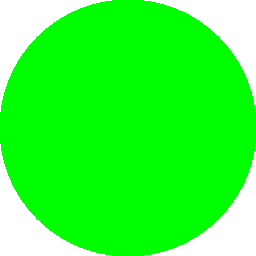

In [16]:
tokyo_station = [35.681236, 139.767125]
tokyo_tower = [35.658581, 139.745433]
gri = [35.6597, 139.75195]

m = folium.Map(
    location=gri,
    tiles='OpenStreetMap',
    zoom_start=13
)

marker = folium.Marker(
    location=gri,
    popup='hogehoge',
    icon=folium.Icon(color='orange')
)

polyline = pd.DataFrame([tokyo_station, gri, tokyo_tower], columns=["lat", "lon"])

line = folium.vector_layers.PolyLine(
    locations=polyline,
    color="olive",                 
    weight=10
)

# マーカーと線の地図レイヤへの追加
m.add_child(marker)
m.add_child(line)

sample_dot = [35.67, 139.74]

icon = CustomIcon(
    icon_image = "images/maru00ff00.png",
    icon_size = (10, 10)
)

m.add_child(
    folium.Marker(
        location=sample_dot,
        tooltip="mouse over",
#         popup="sample",
#         icon=folium.Icon(color="blue"),
        icon=icon
    )
)

m

In [17]:
EARTH_RADIUS = 6378137

A = np.deg2rad(polyline.loc[0,:].tolist())
B = np.deg2rad(polyline.loc[1,:].tolist())
P = np.deg2rad(sample_dot)
print(A, B, P)
p = compute_arc_length(A[0], B[0], A[1], B[1])
a = compute_arc_length(B[0], P[0], B[1], P[1])
b = compute_arc_length(P[0], A[0], P[1], A[1])

alpha = np.arccos((np.cos(a) - np.cos(b) * np.cos(p)) / (np.sin(b) * np.sin(p)))
beta = np.arccos((np.cos(b) - np.cos(a) * np.cos(p)) / (np.sin(a) * np.sin(p)))
print(p, a, b, alpha, beta)

d = np.arcsin(np.sin(a) * np.sin(beta))
EARTH_RADIUS * d

[0.62275505 2.43939652] [0.62237918 2.43913166] [0.62255894 2.4389231 ]
0.00043310096690169067 0.0002470416957974734 0.00043168836059987586 0.5793955987789471 1.275618708705334


1507.5190008785598

In [18]:
d = np.arcsin(np.sin(b) * np.sin(alpha))
EARTH_RADIUS * d

1507.519001484303

In [19]:
d

0.00023635726254928407